# ☠ 6. feladat

### Illesztés - R

- Adott a `../data/grb.csv` mintafájl, melyet olvass be az R-be! A fájl tartalmaz speciális értékeket, melyeket kezelned kell a beolvasásnál!
- Ábrázold az "redshift" függvéynében az "adatok"-at! Az ábárának legyen címe, tengelyfelirata!
- Illessz egyenest az adatokra, és írd fel az ábrára az illeszetett egyenes egyenletét!

In [124]:
dat <- read.csv(file = "../data/grb.csv", header=T,sep = ","," ",".") # beolvasom az filet, és eliminálom a zavaró jeleket

In [125]:
str(dat) #le ellenőrzöm a kinézetét és megnézem az elnevezéseket, ha más változóba akarnám rakni tudjam a nevét

'data.frame':	1107 obs. of  6 variables:
 $ GRB             : Factor w/ 1107 levels "080413B","080503S",..: 943 942 941 940 939 938 937 936 935 934 ...
 $ GRBX.rayposition: Factor w/ 1102 levels "00h00m56s+44°36'",..: 776 295 295 350 477 825 629 797 1033 432 ...
 $ Error           : Factor w/ 160 levels "0.1","1.5","1.6",..: 102 47 34 74 74 74 116 74 74 74 ...
 $ Instrument      : Factor w/ 9 levels "AGILE","AGILE/IPN",..: 4 6 4 9 9 9 4 9 9 9 ...
 $ redshift        : num  2.53 NA NA NA NA ...
 $ adatok          : num  16.3 NA NA NA NA ...


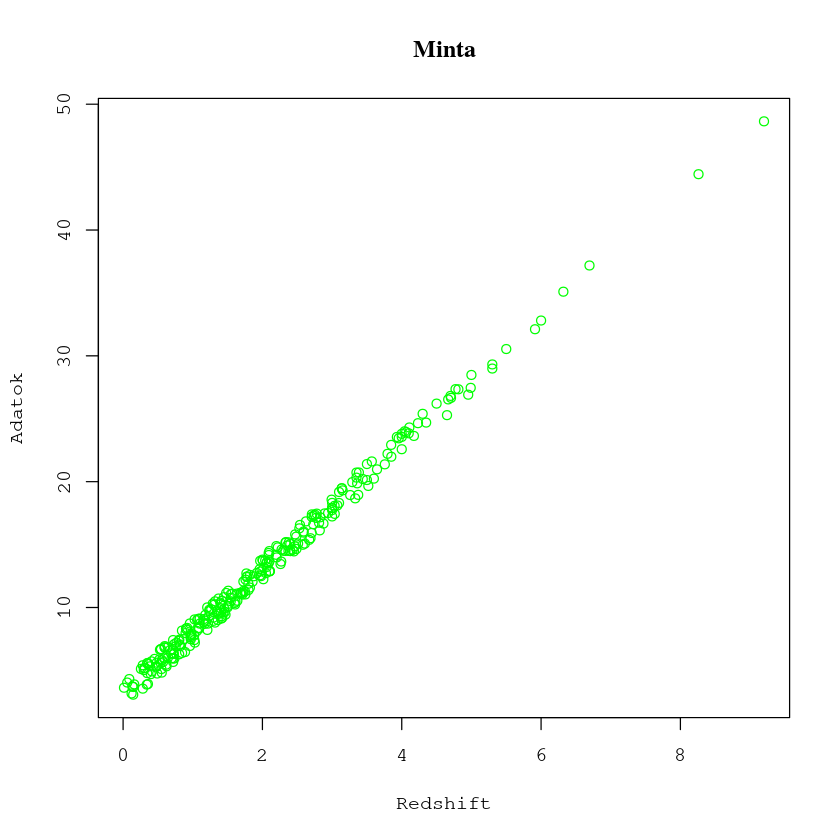

In [126]:
plot(dat$redshift,dat$adatok, xlab="Redshift", ylab="Adatok", main="Minta", col="green", pch=1, type="p") 
# majd plotolom és beállítom a kért paramétereket

In [127]:
lm(dat$adat ~ dat$redshift) # elkészítem a lineáris illesztést


Call:
lm(formula = dat$adat ~ dat$redshift)

Coefficients:
 (Intercept)  dat$redshift  
       3.039         4.999  


In [128]:
fit<-lm(dat$adat ~ dat$redshift) # majd belepakolom a "fit"-be
str(fit) #belenézek a fittbe

List of 13
 $ coefficients : Named num [1:2] 3.04 5
  ..- attr(*, "names")= chr [1:2] "(Intercept)" "dat$redshift"
 $ residuals    : Named num [1:294] 0.6029 -0.2829 0.8348 -0.0944 -0.2256 ...
  ..- attr(*, "names")= chr [1:294] "1" "10" "20" "27" ...
 $ effects      : Named num [1:294] -225.681 -122.626 0.801 -0.151 -0.276 ...
  ..- attr(*, "names")= chr [1:294] "(Intercept)" "dat$redshift" "" "" ...
 $ rank         : int 2
 $ fitted.values: Named num [1:294] 15.69 21.26 12.88 3.78 6.26 ...
  ..- attr(*, "names")= chr [1:294] "1" "10" "20" "27" ...
 $ assign       : int [1:2] 0 1
 $ qr           :List of 5
  ..$ qr   : num [1:294, 1:2] -17.1464 0.0583 0.0583 0.0583 0.0583 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:294] "1" "10" "20" "27" ...
  .. .. ..$ : chr [1:2] "(Intercept)" "dat$redshift"
  .. ..- attr(*, "assign")= int [1:2] 0 1
  ..$ qraux: num [1:2] 1.06 1.06
  ..$ pivot: int [1:2] 1 2
  ..$ tol  : num 1e-07
  ..$ rank : int 2
  ..- attr(*, "class")= chr "

In [129]:
summary(fit) # lellenörzöm hogy a két adathalmazra ileszthetek e lineárist, és az illesztés adatait a coefficients tartalmazza


Call:
lm(formula = dat$adat ~ dat$redshift)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.02336 -0.45516 -0.01901  0.52422  0.95970 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.03909    0.05853   51.92   <2e-16 ***
dat$redshift  4.99926    0.02361  211.76   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5791 on 292 degrees of freedom
  (813 observations deleted due to missingness)
Multiple R-squared:  0.9935,	Adjusted R-squared:  0.9935 
F-statistic: 4.484e+04 on 1 and 292 DF,  p-value: < 2.2e-16


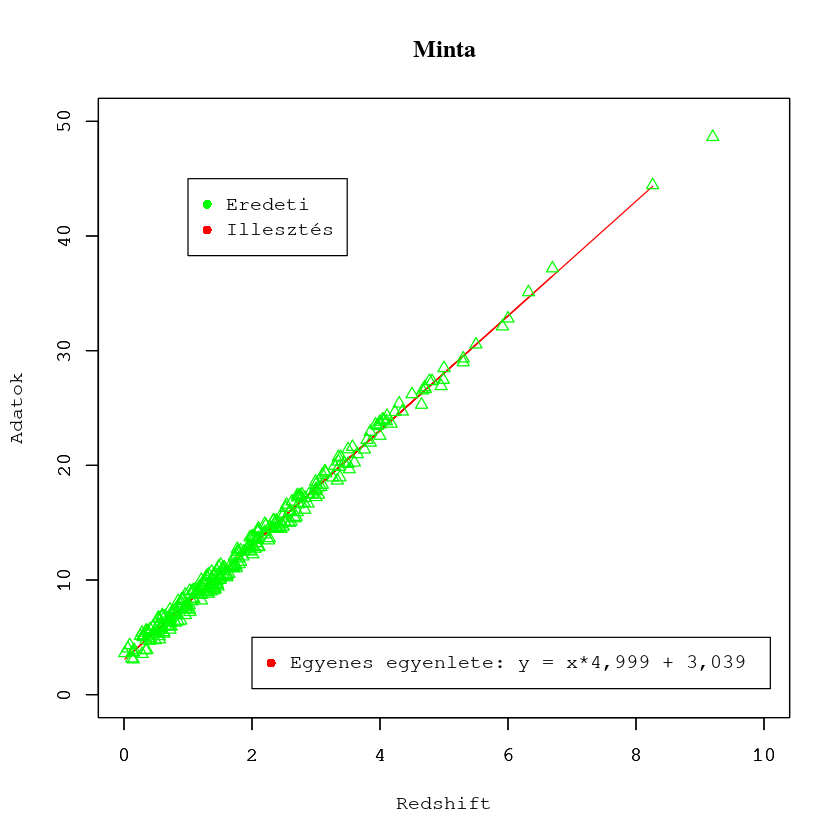

In [153]:
plot(dat$redshift,dat$redshift*fit$coefficients[2]+fit$coefficients[1], type="l", col="red"  #plotolom az illesztést
     , xlab="", ylab="",xlim=c(0,10),ylim=c(0,50))  # és az eredetit egy ábrán
par(new=T)
plot(dat$redshift,dat$adatok, xlab="Redshift", ylab="Adatok", main="Minta", col="green", pch=2, type="p", xlim=c(0,10), ylim=c(0,50))
legend(1,45, c("Eredeti", "Illesztés"),col=c("green","red"), pch = 16)
legend(2,5, c("Egyenes egyenlete: y = x*4,999 + 3,039"), col=c( "red"), pch = 16) #az egyenes egyenlete leolvasható az lm-függvény utáni Coefficients adatokból